# KNN

In [1]:
import pandas as pd

data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
data.isnull().sum().sum()

0

In [3]:
data.drop(['date'], axis = 1, inplace = True)

In [4]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [5]:
x = data[['precipitation','temp_max','temp_min','wind']]
y = data['weather']
y.head()

0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.20)

In [7]:
from sklearn.neighbors import KNeighborsClassifier as knc

model = knc(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred_train = model.predict(x_train)

In [9]:
y_pred_train

array(['sun', 'rain', 'rain', ..., 'sun', 'rain', 'rain'], dtype=object)

In [12]:
y_pred_test = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix as cf

c = cf(y_test,y_pred_test)
c

array([[  1,   0,   0,   0,   7],
       [  1,   6,   4,   0,  19],
       [  1,   3, 105,   0,  13],
       [  1,   0,   2,   1,   2],
       [  2,   4,  16,   0, 105]])

<AxesSubplot:>

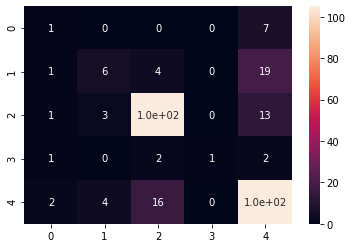

In [14]:
import seaborn as sn

sn.heatmap(c,annot = True)

In [15]:
from sklearn.metrics import accuracy_score

print('Training Data Accuracy : ',accuracy_score(y_train,y_pred_train))

Training Data Accuracy :  0.8287671232876712


In [16]:
print('Testing Data Accuracy : ',accuracy_score(y_test,y_pred_test))

Testing Data Accuracy :  0.7440273037542662


In [17]:
for i in range(1,11):
    model = knc(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred_test = model.predict(x_test)
    print('Accuracy {} :'.format(i),accuracy_score(y_test,y_pred_test))
    

Accuracy 1 : 0.6825938566552902
Accuracy 2 : 0.6450511945392492
Accuracy 3 : 0.7337883959044369
Accuracy 4 : 0.7201365187713311
Accuracy 5 : 0.7440273037542662
Accuracy 6 : 0.7679180887372014
Accuracy 7 : 0.7610921501706485
Accuracy 8 : 0.7372013651877133
Accuracy 9 : 0.7440273037542662
Accuracy 10 : 0.7372013651877133
